In [1]:
import pandas as pd

# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Data/tweets_20201231_verified_norep.json"
df = pd.read_json(path)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.shape

(762377, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762377 entries, 0 to 762376
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   id                 762377 non-null  int64              
 1   conversation_id    762377 non-null  int64              
 2   created_at         762377 non-null  datetime64[ns, UTC]
 3   date               762377 non-null  datetime64[ns]     
 4   time               762377 non-null  object             
 5   timezone           762377 non-null  int64              
 6   user_id            762377 non-null  int64              
 7   username           762377 non-null  object             
 8   name               762377 non-null  object             
 9   place              760602 non-null  object             
 10  tweet              762377 non-null  object             
 11  language           762377 non-null  object             
 12  mentions           155812 non-

In [ ]:
df.isna().sum()

id                        0
conversation_id           0
created_at                0
date                      0
time                      0
timezone                  0
user_id                   0
username                  0
name                      0
place                  1775
tweet                     0
language                  0
mentions             606565
urls                 354066
photos               561154
replies_count             0
retweets_count            0
likes_count               0
hashtags             559373
cashtags             761230
link                      0
retweet                   0
quote_url                 0
video                     0
thumbnail                 0
near                      0
geo                       0
source                    0
user_rt_id                0
user_rt                   0
retweet_id                0
reply_to             762377
retweet_date              0
translate                 0
trans_src                 0
trans_dest          

In [ ]:
df.head(10)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,place.type,place.coordinates
0,1344433081437073410,1344433081437073408,2020-12-30 23:59:59+00:00,2020-12-30,23:59:59,0,22149727,heartnews,American Heart News,,Do you know your stroke risk? Some factors are...,en,None,[http://spr.ly/6010HTNTr],None,0,2,3,"[diet, strokerisk]",None,https://twitter.com/HeartNews/status/134443308...,False,,0,,,,,,,,NaN,,,,,None,None
1,1344433081374167048,1344433081374167040,2020-12-30 23:59:59+00:00,2020-12-30,23:59:59,0,840236394865930240,whnsc45,NSC 45 Archived,,The United States strongly condemns today’s at...,en,None,None,None,3,37,90,None,None,https://twitter.com/WHNSC45/status/13444330813...,False,https://twitter.com/USEmbassyYemen/status/1344...,0,,,,,,,,NaN,,,,,None,None
2,1344433081286057984,1344433081286057984,2020-12-30 23:59:59+00:00,2020-12-30,23:59:59,0,310485559,carrie_byington,"Carrie Byington, MD, FAAP, FIDSA😷",,And now in California. 😷up and follow #public ...,en,None,None,None,0,1,2,[public],None,https://twitter.com/carrie_byington/status/134...,False,https://twitter.com/CDCgov/status/134443238983...,0,,,,,,,,NaN,,,,,None,None
3,1344433081097314304,1344433081097314304,2020-12-30 23:59:59+00:00,2020-12-30,23:59:59,0,119829799,cbssunday,CBS Sunday Morning 🌞,,CONFETTI TEST 🌞 🎉 Confetti was flying in New...,en,None,None,None,3,5,26,None,None,https://twitter.com/CBSSunday/status/134443308...,False,,1,https://pbs.twimg.com/media/EqhiwhoXUAUvX6a.jpg,,,,,,,NaN,,,,,None,None
4,1344433080480759808,1344433080480759808,2020-12-30 23:59:59+00:00,2020-12-30,23:59:59,0,18785182,jeffgspurszone,JeffGSpursKENS5,,"Popovich said following the back to back, Aldr...",en,None,None,None,1,3,22,"[gospursgo, nba]",None,https://twitter.com/JeffGSpursZone/status/1344...,False,,0,,,,,,,,NaN,,,,,None,None
5,1344433077674766336,1344433077674766336,2020-12-30 23:59:58+00:00,2020-12-30,23:59:58,0,2319425220,jonscotttv,Jon Scott,,#Bills news galore on our plate for tonight's ...,en,"[{'screen_name': 'kevc_sports', 'name': 'kevin...",[https://fb.watch/2IPr3q_H5B/],None,0,3,2,[bills],None,https://twitter.com/JonScottTV/status/13444330...,False,,0,,,,,,,,NaN,,,,,None,None
6,1344433077523771393,1344433077523771392,2020-12-30 23:59:58+00:00,2020-12-30,23:59:58,0,45052430,ronmarz,Ron Marz,,"""Justice League Endless Winter #2, takes all o...",en,"[{'screen_name': 'drunkwooky', 'name': 'drunkw...",[https://drunkwooky.com/2020/12/30/drunkwooky-...,None,1,0,9,None,None,https://twitter.com/ronmarz/status/13444330775...,False,,0,,,,,,,,NaN,,,,,None,None
7,1344433077066420226,1344433077066420224,2020-12-30 23:59:58+00:00,2020-12-30,23:59:58,0,392352644,manikadadson,Manika Champ,,Tasmania's young athletes back home to compete...,en,None,[https://www.abc.net.au/news/2020-12-31/tasman...,None,0,2,8,None,None,https://twitter.com/ManikaDadson/status/134443...,False,,0,,,,,,,,NaN,,,,,None,None
8,1344433076089233409,1344433076089233408,2020-12-30 23:59:58+00:00,2020-12-30,23:59:58,0,15053754,otepofficial,👑 OTEP SHAMAYA 👑,,Goddamn you to hell #TraitorTrump,en,None,None,None,3,16,46,[traitortrump],None,https://twitter.com/otepofficial/status/134443...,False,https://twitter.com/cnnbrk/status/134443166229...,0,,,,,,,,NaN,,,,,None,None
9,1344433074331918336,1344433074331918336,2020-12-30 23:59:57+00:00,2020-12-30,23:59:57,0,20530716,joshmohrer,Josh Mohrer,,Why is vaccine distribution in New York going ...,en,"[{'screen_name': 'nycmayorsoffice', 'name': 'n...",None,None,3,1,19,None,None,https://twitter.com/joshmohrer/status/13444330...,False,,0,,,,,,,,NaN,,,,,None,None


In [ ]:
df = df.drop(columns =['geo', 'source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest','place','near'], axis = 1)

In [ ]:
df.shape

(762377, 27)

In [ ]:
df['timezone'].unique()

array([0])

In [ ]:
df['retweet'].unique()

array([False])

In [ ]:
df = df.drop(columns = ['timezone','retweet'], axis = 1)

In [ ]:
import seaborn as sns

Select n numbers of rows randomly using  sample(n=n). Each time you run this, you get n different rows

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dsub = df.sample(n = 100000)

In [ ]:
dsub.to_csv('/content/drive/MyDrive/Data/dsub.csv', index=False)

In [ ]:
dsub = pd.read_csv( '/content/drive/MyDrive/Data/dsub.csv')
dsub.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,time,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,quote_url,video,thumbnail,reply_to,place.type,place.coordinates
0,1344031106241335298,1344031106241335296,2020-12-29 21:22:41+00:00,2020-12-29,21:22:41,21221543.0,juliabainbridge,Julia Bainbridge,"Thread! Epic, @maggiejhoffman 🥂",en,"[{'screen_name': 'maggiejhoffman', 'name': 'ma...",NaN,NaN,1,0.0,2.0,NaN,NaN,https://twitter.com/juliabainbridge/status/134...,https://twitter.com/maggiejhoffman/status/1344...,0.0,NaN,NaN,NaN,NaN
1,1343640000508866567,1343640000508866560,2020-12-28 19:28:34+00:00,2020-12-28,19:28:34,356824820.0,cmanderson247,Chris Anderson,Big 12 has 4 of the top 9 teams in the AP Top ...,en,NaN,NaN,['https://pbs.twimg.com/tweet_video_thumb/EqWR...,8,53.0,372.0,NaN,NaN,https://twitter.com/CMAnderson247/status/13436...,NaN,1.0,https://pbs.twimg.com/tweet_video_thumb/EqWRa0...,NaN,NaN,NaN
2,1344311348705034242,1344311348705034240,2020-12-30 15:56:16+00:00,2020-12-30,15:56:16,10089542.0,danklyn,dan klyn,"Let the record show who ought not (but, of cou...",en,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,https://twitter.com/danklyn/status/13443113487...,https://twitter.com/mikedebonis/status/1344308...,0.0,NaN,NaN,NaN,NaN
3,1344040755086716928,1344040755086716928,2020-12-29 22:01:01+00:00,2020-12-29,22:01:01,20987430.0,occ_shoeboxes,Operation Christmas Child,Marika and Mike Chasse along with a group of f...,en,"[{'screen_name': 'ajc', 'name': 'atlanta journ...",['http://sampur.se/3o0J7Fb'],NaN,1,2.0,20.0,['operationchristmaschild'],NaN,https://twitter.com/OCC_shoeboxes/status/13440...,NaN,0.0,NaN,NaN,NaN,NaN
4,1343890291967864834,1343890291967864832,2020-12-29 12:03:08+00:00,2020-12-29,12:03:08,252751061.0,quicktake,Bloomberg Quicktake,▪️How did this happen? ▪️Who was affected? ▪️...,en,NaN,['https://trib.al/mDoxVOF'],['https://pbs.twimg.com/media/EqZ1GVBWMAIvsbw....,2,6.0,30.0,NaN,NaN,https://twitter.com/Quicktake/status/134389029...,NaN,1.0,https://pbs.twimg.com/media/EqZ1GVBWMAIvsbw.jpg,NaN,NaN,NaN
5,1344328072628211714,1344328072628211712,2020-12-30 17:02:43+00:00,2020-12-30,17:02:43,24486762.0,warheads,WARHEADS®,Cause it won’t cover much else amiright? http...,en,NaN,NaN,['https://pbs.twimg.com/media/EqgC5GXXYAEFBxS....,2,1.0,20.0,NaN,NaN,https://twitter.com/WARHEADS/status/1344328072...,NaN,1.0,https://pbs.twimg.com/media/EqgC5GXXYAEFBxS.jpg,NaN,NaN,NaN
6,1344407828551917569,1344407828551917568,2020-12-30 22:19:38+00:00,2020-12-30,22:19:38,14762429.0,sbz,sara zucker,Judaism teaching consent + a woman’s right to ...,en,NaN,NaN,['https://pbs.twimg.com/media/EqhLyrYW4AEOnNa....,1,0.0,9.0,NaN,NaN,https://twitter.com/sbz/status/134440782855191...,NaN,1.0,https://pbs.twimg.com/media/EqhLyrYW4AEOnNa.jpg,NaN,NaN,NaN
7,1343687061199613952,1343687061199613952,2020-12-28 22:35:34+00:00,2020-12-28,22:35:34,22129280.0,jimsciutto,Jim Sciutto,In midst worsening pandemic &amp; Nashville su...,en,NaN,['https://www.cnn.com/2020/12/28/politics/bide...,NaN,31,108.0,368.0,NaN,NaN,https://twitter.com/jimsciutto/status/13436870...,NaN,0.0,NaN,NaN,NaN,NaN
8,1343699514310471681,1343699514310471680,2020-12-28 23:25:03+00:00,2020-12-28,23:25:03,796435297.0,hits93toronto,Hits 93 Toronto,Now Playing: A Billion Heartbeats by Mystery J...,en,NaN,['https://www.radioking.com/radio/hits-93-toro...,NaN,3,0.0,2.0,NaN,NaN,https://twitter.com/Hits93Toronto/status/13436...,NaN,0.0,NaN,NaN,NaN,NaN
9,1344395534329667584,1344395534329667584,2020-12-30 21:30:47+00:00,2020-12-30,21:30:47,618657450.0,alexalecciwesh,Alex Alecci,Looking like a fantastic evening ahead! https...,en,NaN,NaN,['https://pbs.twimg.com/media/EqhAmehXcAAnltH....,0,0.0,2.0,NaN,NaN,https://twitter.com/AlexAlecciWESH/status/1344...,NaN,1.0,https://pbs.twimg.com/media/EqhAmehXcAAnltH.jpg,NaN,NaN,NaN


In [ ]:
dsub = dsub[['retweets_count','likes_count','replies_count']]

In [ ]:
dsub.index[dsub['replies_count'] == 'https://pbs.twimg.com/media/EqXq38sVEAAsnAk.jpg'].tolist()

[60187]

In [ ]:
dsub.loc[60187]

retweets_count                                                NaN
likes_count                                                   NaN
replies_count     https://pbs.twimg.com/media/EqXq38sVEAAsnAk.jpg
Name: 60187, dtype: object

In [ ]:
dnum = dsub.drop(index=60187)

In [ ]:
dnum = dnum.astype({'replies_count': 'float64'})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

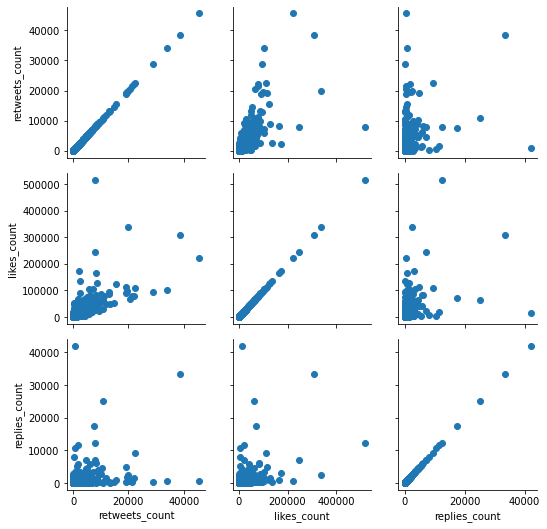

In [ ]:
g = sns.PairGrid(dnum)
g.map(plt.scatter )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


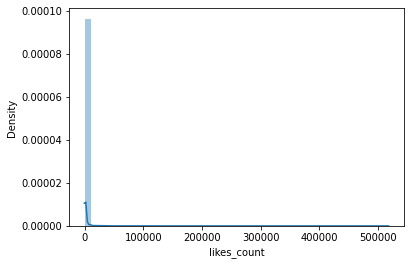

In [ ]:
sns.distplot(dnum['likes_count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


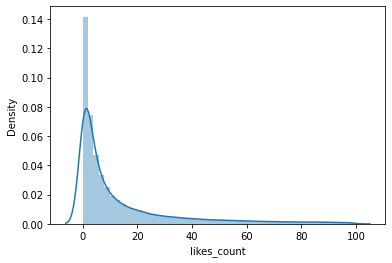

In [ ]:
df2 = dnum.loc[((dnum['likes_count'] >= 0) & (dnum['likes_count'] < 100))]
sns.distplot(df2['likes_count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


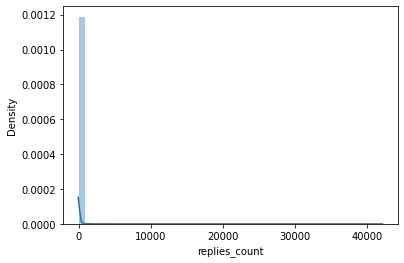

In [ ]:
sns.distplot(dnum['replies_count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


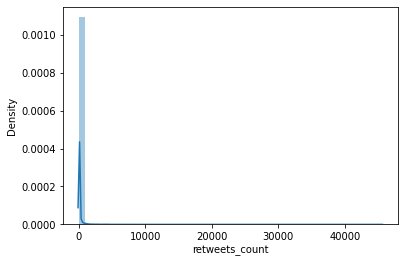

In [ ]:
sns.distplot(dnum['retweets_count'])

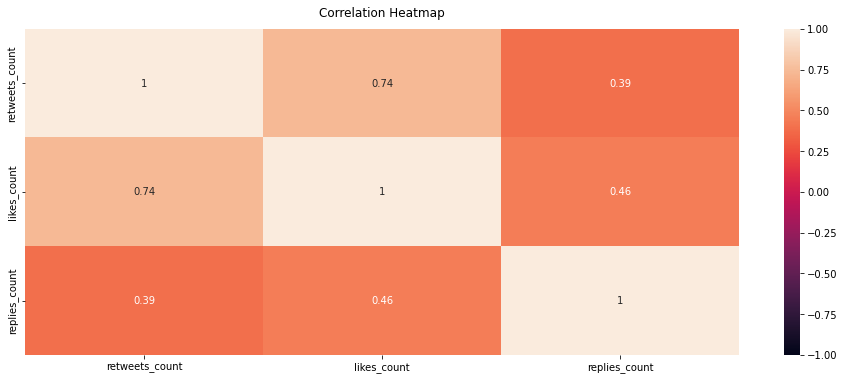

In [ ]:

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dnum.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

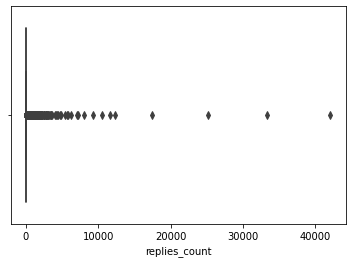

In [ ]:
sns.boxplot(x=dnum["replies_count"])

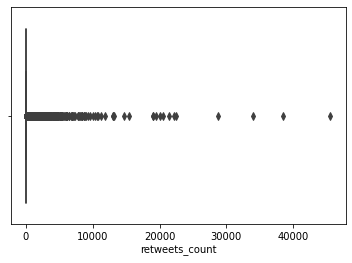

In [ ]:
sns.boxplot(x=dnum["retweets_count"])

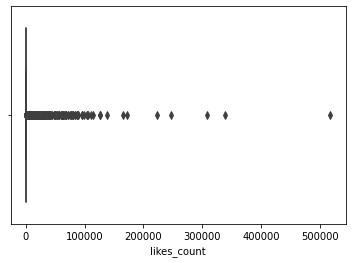

In [ ]:
sns.boxplot(x=dnum["likes_count"])

Drop outliers

In [ ]:
dnum.drop(dnum[dnum['likes_count'] > 100000].index, inplace = True)

In [ ]:
dnum.drop(dnum[dnum['replies_count'] > 10000].index, inplace = True)

In [ ]:
dnum.drop(dnum[dnum['retweets_count'] > 10000].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


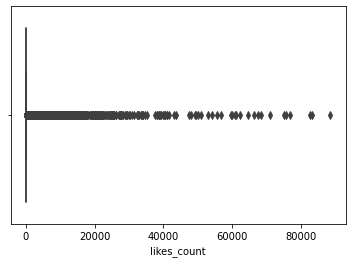

In [ ]:
sns.boxplot(dnum['likes_count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


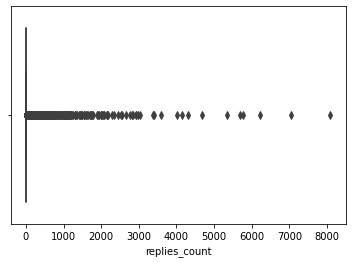

In [ ]:
sns.boxplot(dnum['replies_count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


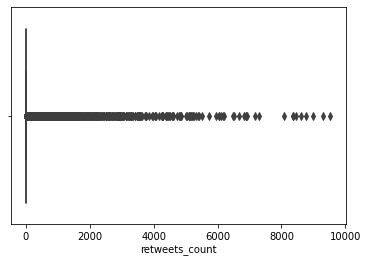

In [ ]:
sns.boxplot(dnum['retweets_count'])

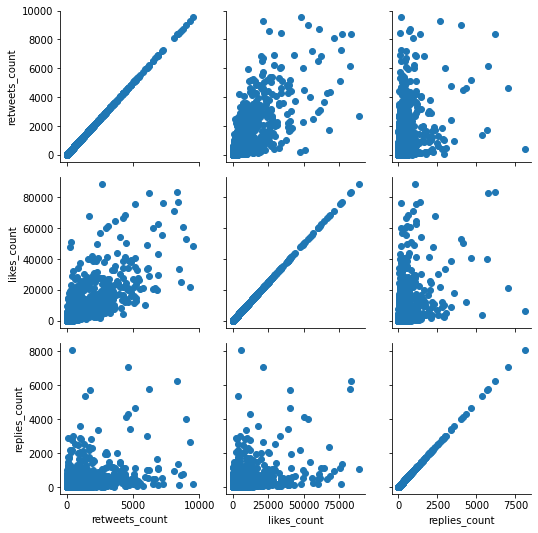

In [ ]:
g = sns.PairGrid(dnum)
g.map(plt.scatter)

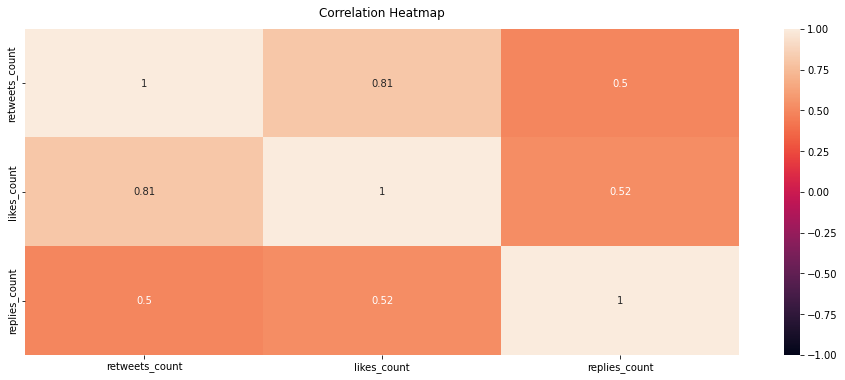

In [ ]:

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dnum.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);